In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

from PIL import Image

In [2]:
from importlib.metadata import version
import cv2
import pixellib


print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


In [3]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file) 

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f923043d3a0>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

(1) Object

(720, 960, 3)


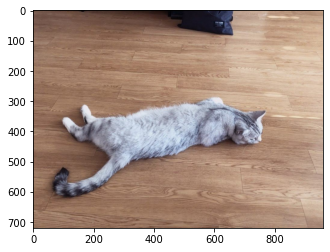

In [5]:
img_path = './cat.jpg'
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
# (720, 960, 3)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

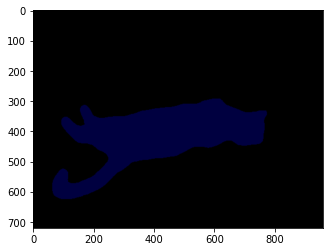

In [6]:
segvalues1, output1 = model.segmentAsPascalvoc(img_path)
plt.imshow(output1)
plt.show()

In [7]:
color_map = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        color_map[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

(720, 960)


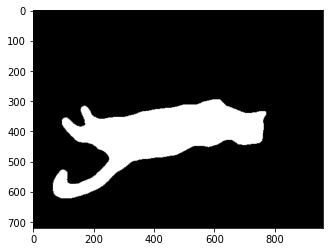

In [8]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
index = LABEL_NAMES.index('cat')

seg_color = (color_map[index][2], color_map[index][1], color_map[index][0])
seg_map1 = np.all(output1==seg_color, axis=-1) 
print(seg_map1.shape) 
plt.imshow(seg_map1, cmap='gray')
plt.show()

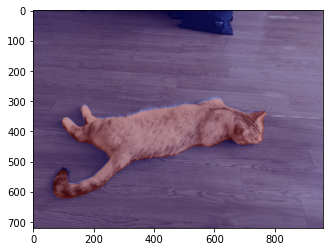

In [10]:
img_orig = cv2.imread(img_path) 
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map1.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

(2) Background

(720, 550, 3)


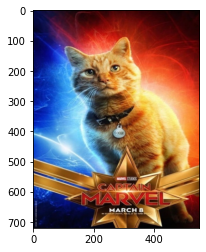

In [11]:
bg_path = './CaptainGoose.jpg'
bg_orig = cv2.imread(bg_path)

print(bg_orig.shape)

plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

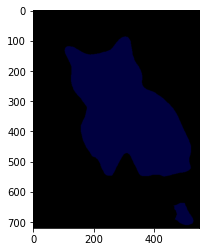

In [12]:
segvalues2, output2 = model.segmentAsPascalvoc(bg_path)
plt.imshow(output2)
plt.show()

(720, 550)


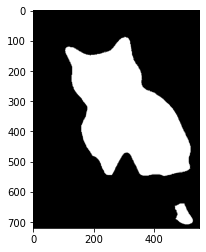

In [15]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
index = LABEL_NAMES.index('cat')

seg_color = (color_map[index][2], color_map[index][1], color_map[index][0])
seg_map2 = np.all(output2==seg_color, axis=-1) 
print(seg_map2.shape) 
plt.imshow(seg_map2, cmap='gray')
plt.show()

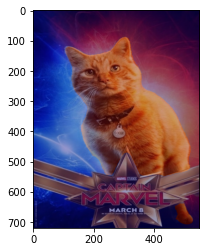

In [16]:
bg_show = bg_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
bg_show = cv2.addWeighted(bg_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(bg_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img_orig = cv2.imread(img_path) 
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img_bg = cv2.imread(bg_path)
resized_img_bg = cv2.resize(img_bg, (img_mask_color.shape[1], img_mask_color.shape[0]))


# 배경과 im_orig(회색고양이) 합성
img_concat = np.where(img_mask_color == 255, resized_img_bg, img_orig)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(720, 960, 3)


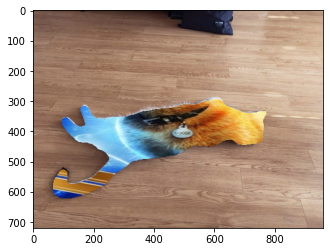

In [23]:
img_bg = cv2.imread(bg_path)
resized_img_bg = cv2.resize(img_bg, (img_mask_color.shape[1], img_mask_color.shape[0]))

print(resized_img_bg.shape)
img_concat = np.where(img_mask_color == 255, resized_img_bg, img_orig)


plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()